### Домашнее задание к лекции "Визуализация данных". Обязательная часть

Вам необходимо провести базовый EDA выбранного набора данных.
EDA:

#### Требования к анализу:
* построить не менее 4 визуализаций различных видов;
* каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
* по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [3]:
import requests
import time
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
#data = pd.read_csv('names/yob2017.txt',names=['Name', 'Gender', 'Count'])
data = pd.read_csv('film_archive/IMDb movies.csv')

In [128]:
genres = ['Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Fantasy', 'History', 'Romance', 'Sci-Fi',
 'Biography', 'Family', 'Music', 'Romance', 'Thriller','War', 'Western', 'Mystery', 'Horror', 'Sport']

In [129]:
for genre in genres:
    data[genre] = data.apply(lambda row: row.avg_vote if genre in row.genre else None, axis=1)

In [275]:
only_need = data[['imdb_title_id', 'year', 'genre', 'duration', 'country', 'production_company', 'avg_vote', 
      'votes', 'metascore', 'reviews_from_users', 'reviews_from_critics', 'Action', 'Adventure', 'Comedy', 'Crime', 
      'Drama', 'Fantasy', 'History', 'Romance', 'Sci-Fi', 'Biography', 'Family', 'Music', 'Thriller', 'War', 'Western',
      'Mystery', 'Horror', 'Sport']]
only_need_ = only_need.query('duration < 200')

In [276]:
genre_count_v = only_need_.pivot_table(
                        index='year', 
                        columns=None, 
                        values=['Action', 'Adventure', 'Comedy', 'Crime', 'Drama',
                                'Romance', 'Music', 'Thriller', 'War', 'Western', 'Mystery', 'Horror'], 
                        aggfunc='count')
genre_count_v

,Action,Adventure,Comedy,Crime,Drama,Horror,Music,Mystery,Romance,Thriller,War,Western
year,,,,,,,,,,,,
1906,0,0,0,1,1,0,0,0,0,0,0,0
1911,0,1,0,0,3,0,0,0,0,0,2,0
1912,0,0,0,1,4,0,0,1,0,0,1,0
1913,0,2,1,5,11,1,0,1,0,0,0,0
1914,2,4,3,3,15,1,0,1,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,441,221,962,254,1571,453,73,201,419,541,42,12
2016,505,227,993,330,1641,435,61,212,404,566,35,12
2017,499,236,961,322,1657,463,83,227,375,566,48,22


In [334]:
only_need_['different duration'] = only_need_.apply(lambda x: round(x.duration/60), axis=1)
only_need_.head(3)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,imdb_title_id,year,genre,duration,country,production_company,avg_vote,votes,metascore,reviews_from_users,...,Biography,Family,Music,Thriller,War,Western,Mystery,Horror,Sport,different duration
0,tt0000574,1906,"Biography, Crime, Drama",70,Australia,J. and N. Tait,6.1,537,NaN,7.0,...,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,tt0001892,1911,Drama,53,"Germany, Denmark",Fotorama,5.9,171,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,tt0002101,1912,"Drama, History",100,USA,Helen Gardner Picture Players,5.2,420,NaN,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


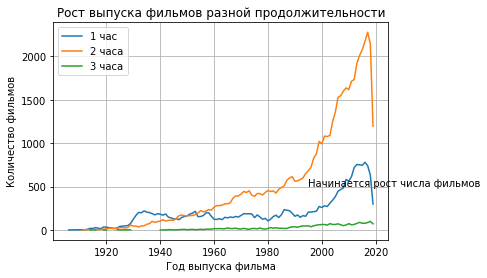

In [365]:
duration_dynamics = only_need_.groupby(['year', 'different duration'])['imdb_title_id'].count()

dd = duration_dynamics.unstack('different duration').plot()

dd.set_title('Рост выпуска фильмов разной продолжительности', fontsize=12)
dd.text(1995, 500, 'Начинается рост числа фильмов')
dd.grid()
dd.set_xlabel('Год выпуска фильма')
dd.set_ylabel('Количество фильмов')
dd.tick_params(which='minor', length=10, width=2)
dd.legend(['1 час', '2 часа', '3 часа'])

### Факты: 
1. Лавинообразный рост фильмов с длит. 2-2,5 часа начинается после 1990 года 
2. Рост числа фильмов с продолжительностью 2-2,5 часа начинается раньше на 10 лет нежели с продолжительностью 1-1,5.

### Гипотеза:
1. Становятся популярны блокбастеры и экшен фильмы, начинается бум сериалов (кабельное ТВ)
2. Стоимость производства фильма падает и на рынок приходят фильмы созданные небольшими студиями за скромные бюджеты

Text(0, 0.5, 'avg_vote')

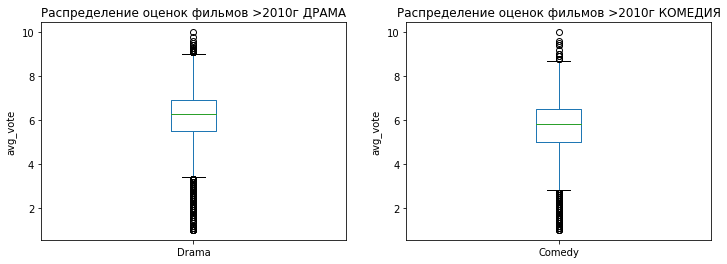

In [332]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
avg_vote_period = only_need_.query('year > 2010')

#ax = reviews_critics.reviews_from_critics.hist(bins=40)
axDr = avg_vote_period.Drama.plot(kind='box', ax=axes[0])
axCom = avg_vote_period.Comedy.plot(kind='box', ax=axes[1])

axDr.set_title('Распределение оценок фильмов >2010г ДРАМА')
axDr.set_ylabel('avg_vote')
axCom.set_title('Распределение оценок фильмов >2010г КОМЕДИЯ')
axCom.set_ylabel('avg_vote')

### Факты: 
Сравнение оценок за фильмы самых популярных жанров (Комедии и Драмы), к удивлению, 
показало сравнительно одинаковые результаты по их распределению.

### Гипотеза:
Характер переживания действия фильма (позитивные или напряженные) не влияют на уровень его оценки

In [370]:
top_country_vote = only_need_.groupby('country')[['avg_vote']].mean()\
    .sort_values('avg_vote', ascending=False)
    
tcv = top_country_vote.head(20)

print('Средняя оценка фильмов производства разных стран')
tcv.style.bar()

Средняя оценка фильмов производства разных стран


,avg_vote
country,
"Honduras, USA",8.800000
"Hungary, UK, USA",8.700000
"Republic of Macedonia, Poland",8.500000
"USA, UK, Malta, Morocco",8.500000
"UK, France, Poland, Germany",8.500000
"Bulgaria, Qatar",8.500000
Myanmar,8.450000
"Lebanon, France, USA, Cyprus, Qatar",8.400000
"Libya, USA",8.400000


### Факты: 
Самые высоки оценки имеют фильмы совместного производства

### Гипотеза:
1. Разное восприятие позволяет создавать картины, имеющие более широкую аудиторию
2. Играет роль политика

РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ФИЛЬМОВ В РАЗНЫЕ ГОДЫ ПО ПОПУЛЯРНЫМ ЖАНРАМ


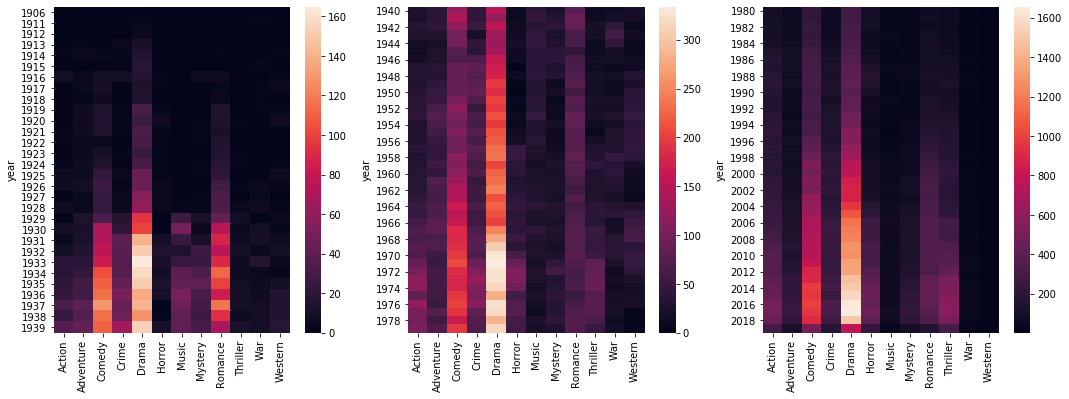

In [283]:
fig, axes = plt.subplots(ncols=3, figsize=(18, 6))
generations1 = 1940
generations2 = 1980

year_genre1 = sns.heatmap(genre_count_v.query('year < @generations1'), ax=axes[0])
year_genre2 = sns.heatmap(genre_count_v.query('year >= @generations1 & year < @generations2'), ax=axes[1])
year_genre3 = sns.heatmap(genre_count_v.query('year >= @generations2'), ax=axes[2])
print('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ФИЛЬМОВ В РАЗНЫЕ ГОДЫ ПО ПОПУЛЯРНЫМ ЖАНРАМ')

### Факты:
1. Самые популярные жанры всех времен Комедия и Драма
2. Романтика имеет всплеск интереса в 30-х годах и после практически исчезает
3. Тематика войны и вестерны заметна с 1946 по начало 70-х.
4. Музыкальные фильмы актуальны были в 30-х годах 

### Гипотеза:¶
1. Жанры Комедия и Драма являются основными, остальные отражают лишь особенности, и каждый имеет узкую аудиторию
2. Народ избалован и чем дальше, тем больше хочет впечатлений и большей натуральности. Может поэтому и жанры Триллер и Хоррор появляются в 70-х и начинают расти аналогично основным жанрам.
3. Послевоенные годы, поколение пережившее войну
4. В 30-х годах пояляется звуковое кино, взамен немому. Тогда как появление цветного кино в конце 50-х годов уже не сказалось на росте популярности кинематографа.

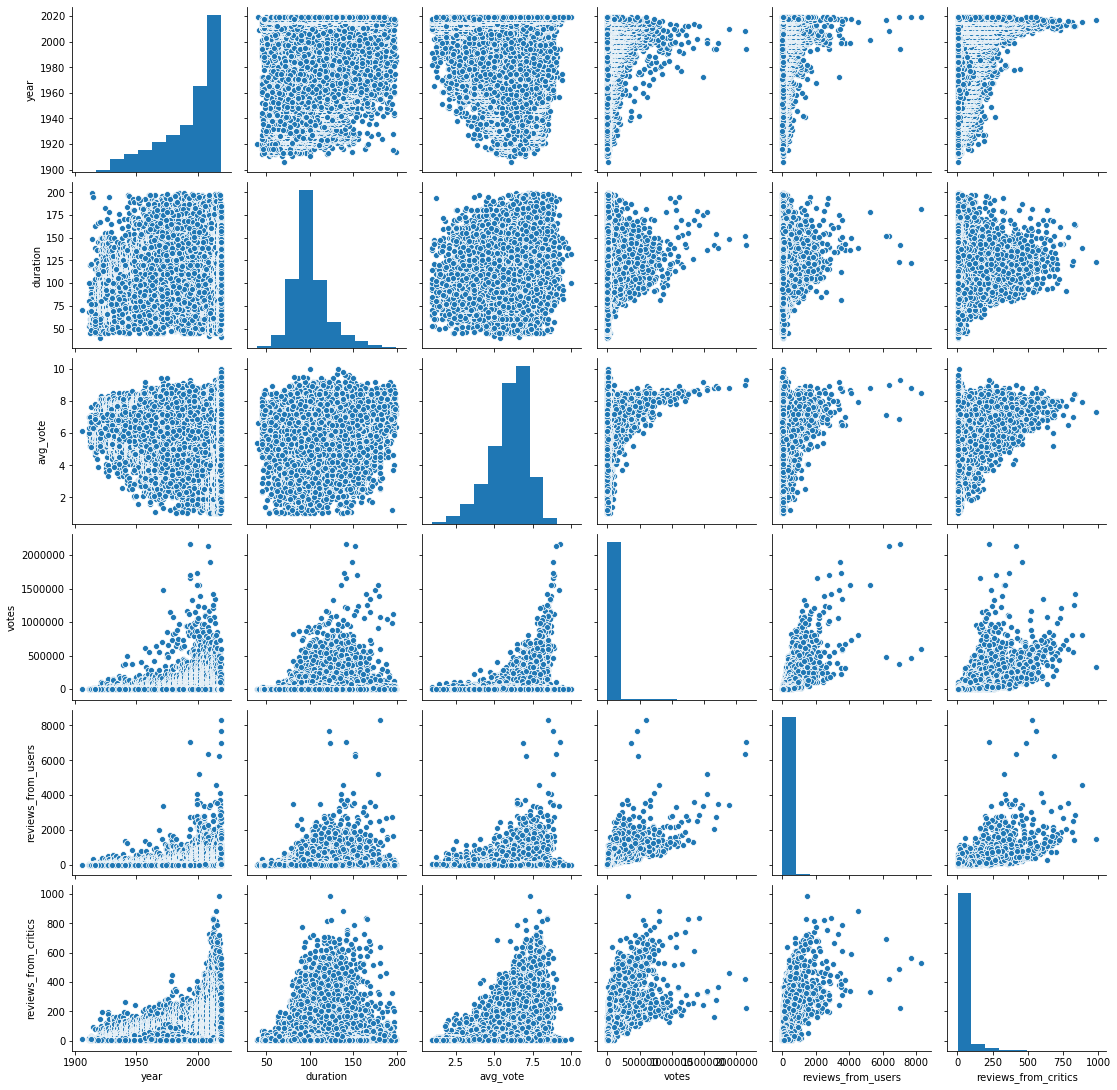

In [286]:
sns_plot = sns.pairplot(
    only_need_[['year', 'duration', 'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics']])
sns_plot

### Факты:
1. Наибольшая корреляция наблюдается по показателю числа голосов. Чем больше голосов, тем меньше разброс в оценках фильмов (avg_vote).
2. С каждым десятилетием растет число отзывов от критиков (максимальные значения), тогда как число отзывов от пользователей неизменно с 2000 года

### Гипотеза:
1. По всей видимости, число голосов определяется популярностью фильма, которая в свою очередь обусловлена его качеством, а значит оценкой.
2. Пользователи с появлением гаджетов доверяют рейтингам и отзывам критиков и чаще оставляют негативные отзывы, нежели позитивные